In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np



cmip_file='agg_macav2metdata_pr_CCSM4_r6i1p1_rcp85_2006_2099_CONUS_monthly.nc'

In [2]:
ds_pr=xr.open_dataset(cmip_file)
ds_pr

<xarray.Dataset>
Dimensions:        (time: 1128, lat: 49, lon: 73)
Coordinates:
  * time           (time) object 2006-01-15 00:00:00 ... 2099-12-15 00:00:00
  * lat            (lat) float64 46.48 46.52 46.56 46.6 ... 48.4 48.44 48.48
  * lon            (lon) float64 242.5 242.6 242.6 242.6 ... 245.4 245.5 245.5
Data variables:
    precipitation  (time, lat, lon) float32 ...
Attributes: (12/48)
    description:                     Multivariate Adaptive Constructed Analog...
    id:                              MACAv2-METDATA
    naming_authority:                edu.uidaho.reacch
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Metadata_Link:                   
    cdm_data_type:                   FLOAT
    ...                              ...
    publisher_email:                 reacch@uidaho.edu
    publisher_url:                   http://www.reacchpna.org/
    license:                         Creative Commons CC0 1.0 Universal Dedic...
    coordinate_system:               WGS84,EPSG:4326
    Conventions:                     CF-1.0
    History:                         Translated to CF-1.0 Conventions by Netc...

In [3]:
ds_pr.attrs  # Display datasets attributes

{'description': 'Multivariate Adaptive Constructed Analogs (MACA) method, version 2.3,Dec 2013.',
 'id': 'MACAv2-METDATA',
 'naming_authority': 'edu.uidaho.reacch',
 'Metadata_Conventions': 'Unidata Dataset Discovery v1.0',
 'Metadata_Link': '',
 'cdm_data_type': 'FLOAT',
 'title': 'Monthly aggregation of downscaled daily meteorological data of Monthly Precipitation Amount from University of Miami - RSMAS (CCSM4) using the run r6i1p1 of the rcp85 scenario.',
 'summary': 'This archive contains monthly downscaled meteorological and hydrological projections for the Conterminous United States at 1/24-deg resolution. These monthly values are obtained by aggregating the daily values obtained from the downscaling using the Multivariate Adaptive Constructed Analogs (MACA, Abatzoglou, 2012) statistical downscaling method with the METDATA (Abatzoglou,2013) training dataset. The downscaled meteorological variables are maximum/minimum temperature(tasmax/tasmin), maximum/minimum relative humidity (

Text(0, 0.5, 'Mean Monthly Precipitation [mm]')

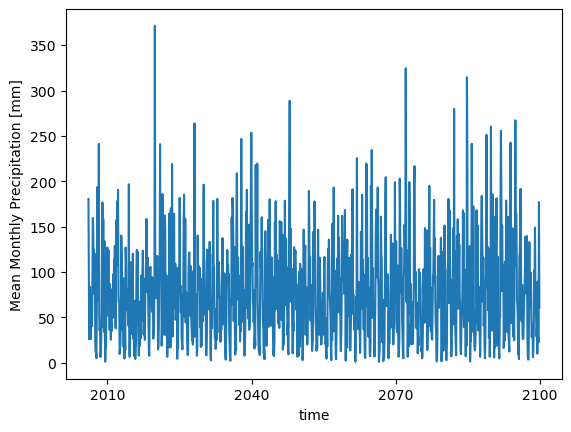

In [4]:
ds_pr['precipitation'].mean(dim=('lat','lon')).plot() # QUICK PLOT OF PRECIPITATION OVER THE REGION 
# Mean monthly precipitation
plt.ylabel('Mean Monthly Precipitation [mm]')

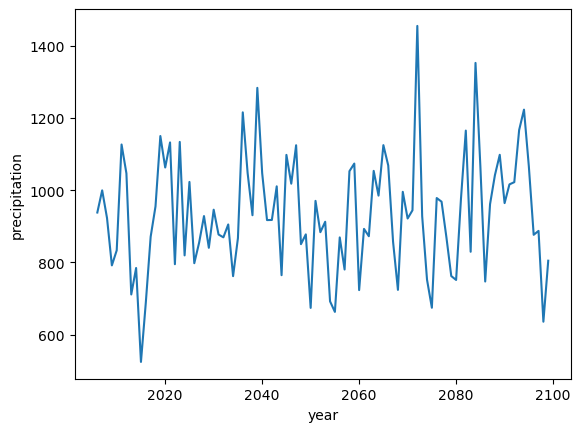

In [5]:
## Annual precipitation in the study area

ds_pr['precipitation'].mean(dim=('lat','lon')).groupby('time.year').sum(dim='time').plot()

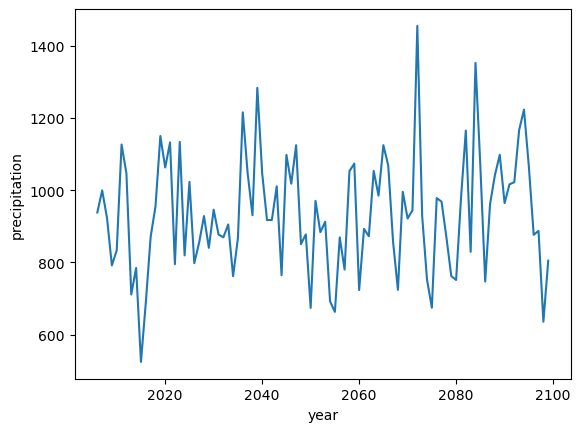

In [6]:
# A different approach to the above. (A more logical approach in my opinion!!)

ds_pr['precipitation'].groupby('time.year').sum(dim=('time')).mean(dim=('lat','lon')).plot()

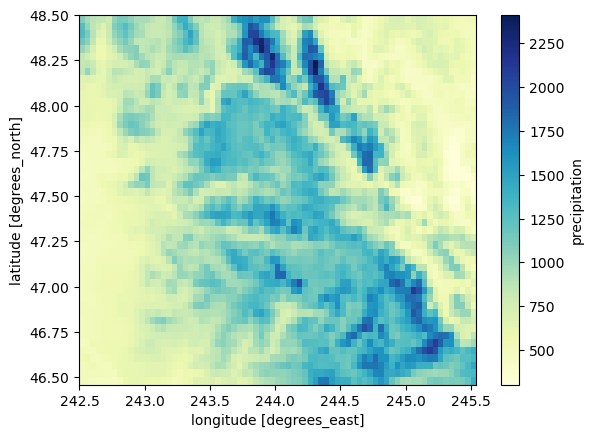

In [7]:
ds_pr['precipitation'].groupby('time.year').sum(dim='time').mean(dim='year').plot(cmap='YlGnBu') # Mean annual precipitation

In [8]:
ds_pr['precipitation'].groupby('time.month') # Checks if I am in the right direction!

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

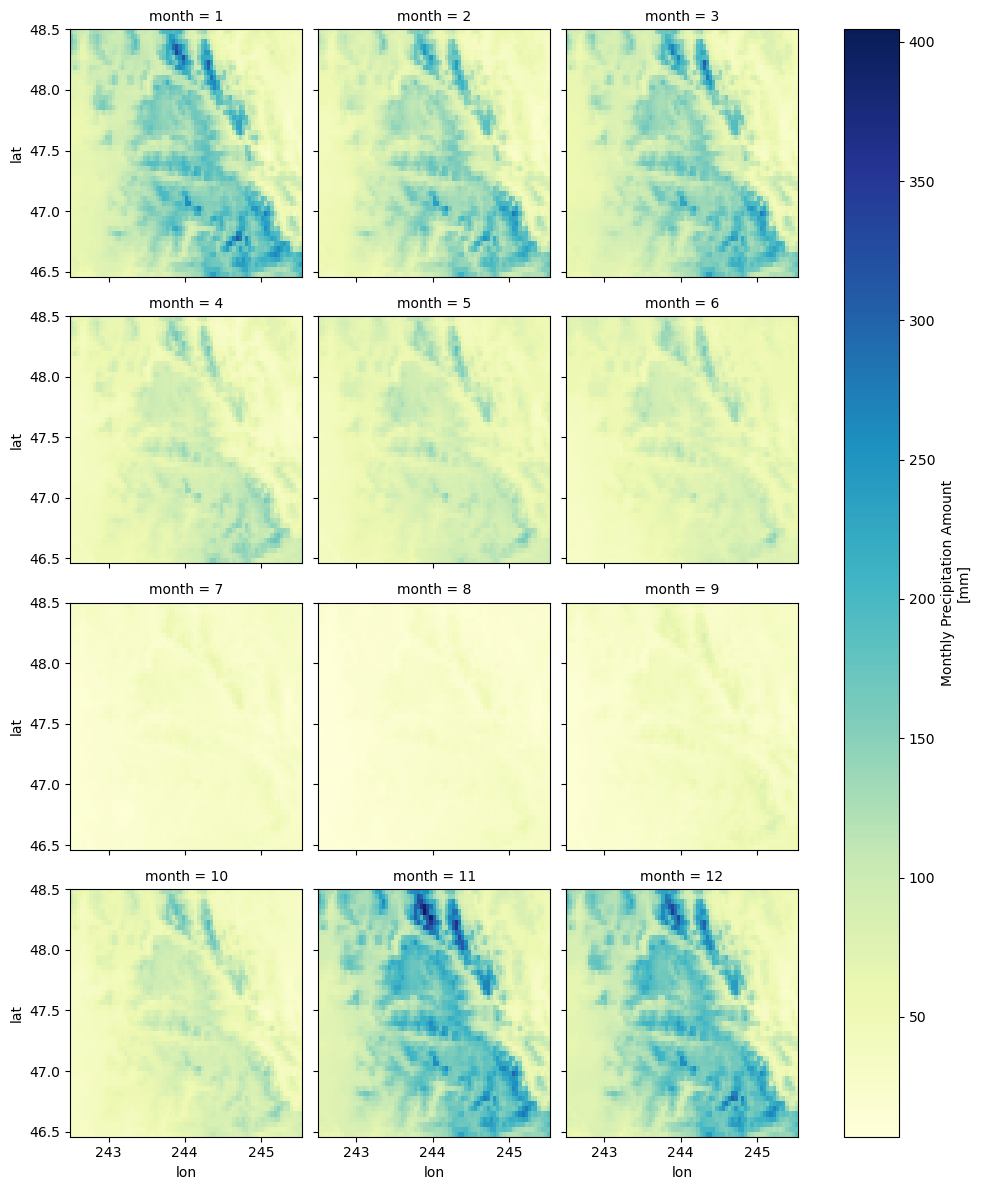

In [9]:
ds_pr['precipitation'].groupby('time.month').mean(dim='time').plot(col='month',col_wrap=3,cmap='YlGnBu') # Seasonal circle, we expect 12 plots!